# Spam Detector

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [11]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
#look at data types
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [9]:
#check for nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

I predict that a random forest classifier will be a better model with this data because there are 57 features which may contribute to the likelihood of an item being spam, and it's not clear if the relationships between the features and the spam classification is linear, so I'm hypothesizing that it will work better with a model that can handle a feature-rich data set that is not necessarily linear.  The random forest uses multiple models that are decision trees and can account for nonlinear relationships in ways that logistic regression cannot.

## Split the Data into Training and Testing Sets

In [13]:
# Create the labels set `y` and features DataFrame `X`

# creating X
X = data.copy()
X = X.drop(columns="spam")
X.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [21]:
# creating y 
y = data["spam"]
y

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: spam, Length: 4601, dtype: int64

In [22]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.

y.value_counts()



spam
0    2788
1    1813
Name: count, dtype: int64

In [23]:
# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y)


## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [24]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance

scaler = StandardScaler()


In [25]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [27]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [48]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=1, max_iter=500)

logistic_regression_model.fit(X_train_scaled, y_train)

print(f"Training Score: {logistic_regression_model.score(X_train_scaled, y_train)}")
print(f"Testing Score: {logistic_regression_model.score(X_test_scaled, y_test)}")




Training Score: 0.9307246376811594
Testing Score: 0.9209383145091226


In [39]:
# Make and save testing predictions with the saved logistic regression model using the test data
test_predictions = logistic_regression_model.predict(X_test_scaled)

# Review the predictions
test_predictions

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [44]:
# Look at value count of predictions
pred_df = pd.DataFrame(test_predictions)
pred_df.value_counts()


0    695
1    456
Name: count, dtype: int64

In [45]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_score(y_test, test_predictions)

0.9209383145091226

## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [47]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

print(f'Training Score: {random.score(X_train_scaled, y_train)}')
print(f'Testing Score: {random.score(X_test_scaled, y_test)}')


Training Score: 0.9997101449275362
Testing Score: 0.9600347523892268


In [49]:
# Make and save testing predictions with the saved logistic regression model using the test data
random_predictions = random.predict(X_test_scaled)

# Review the predictions
random_predictions


array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [50]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_score(y_test, random_predictions)

0.9600347523892268

In [51]:
# set up feature importance array
rf_importance = random.feature_importances_

# top 10 most important features
rf_importance_sorted = sorted(zip(rf_importance, X.columns), reverse=True)
rf_importance_sorted[:10]

[(0.12318484403040972, 'char_freq_!'),
 (0.1013828643305942, 'char_freq_$'),
 (0.07205709965936298, 'word_freq_remove'),
 (0.06788216433983002, 'word_freq_free'),
 (0.0653663633953865, 'capital_run_length_average'),
 (0.057431702211400086, 'capital_run_length_longest'),
 (0.05390545647895589, 'word_freq_your'),
 (0.044414831908929746, 'capital_run_length_total'),
 (0.042260457925142755, 'word_freq_hp'),
 (0.030167418535690743, 'word_freq_our')]

## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

The random forest performed better with an accuracy score of 96%, versus the logistic regression accuracy score of 92%. The result is consistent with my prediction, which was that the random forest would perform better. See below output for summary scores of both models. I'm curious if performing PCA on the data first would result in the logistic regression model having a higher accuracy score.

In [54]:
# See all scores together

print(f"Logistic Regression Training Score: {logistic_regression_model.score(X_train_scaled, y_train)}")
print(f"Logistic Regression Testing Score: {logistic_regression_model.score(X_test_scaled, y_test)}")
print(f"Logistic Regression Accuracy Score: {accuracy_score(y_test, test_predictions)}")
print("****************************************************")
print(f'Random Forest Training Score: {random.score(X_train_scaled, y_train)}')
print(f'Random Forest Testing Score: {random.score(X_test_scaled, y_test)}')
print(f"Random Forest Accuracy Score: {accuracy_score(y_test, random_predictions)}")

Logistic Regression Training Score: 0.9307246376811594
Logistic Regression Testing Score: 0.9209383145091226
Logistic Regression Accuracy Score: 0.9209383145091226
****************************************************
Random Forest Training Score: 0.9997101449275362
Random Forest Testing Score: 0.9600347523892268
Random Forest Accuracy Score: 0.9600347523892268


In [55]:
# import PCA

from sklearn.decomposition import PCA

In [81]:
# instantiate PCA instance and declare number of PCA variables

pca_train = PCA(n_components=48)
pca_test = PCA(n_components=48)

# fit PCA model on scaled training data

pca_X_train_scaled = pca_train.fit_transform(X_train_scaled)
pca_X_test_scaled = pca_test.fit_transform(X_test_scaled)


In [86]:
# calculate PCA explained variance ratio

print(f"{sum(pca_train.explained_variance_ratio_)*100}")
print(f"{sum(pca_test.explained_variance_ratio_)*100}")


95.40677004267239
97.79836067466388


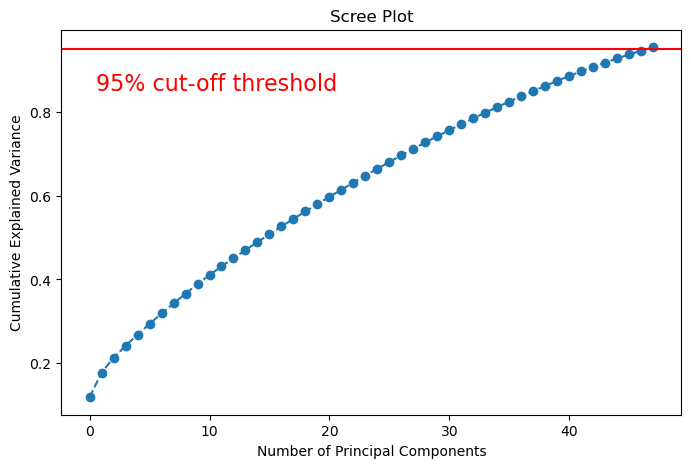

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Extract the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Prepare the scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

# Optional: Add a threshold line, e.g., 0.95 for 95% variance
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

plt.show()

In [78]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression

pca_logistic_regression_model = LogisticRegression(random_state=1, max_iter=500)

pca_logistic_regression_model.fit(pca_X_train_scaled, y_train)

print(f"Training Score: {pca_logistic_regression_model.score(pca_X_train_scaled, y_train)}")
print(f"Testing Score: {pca_logistic_regression_model.score(X_test_scaled, y_test)}")

Training Score: 0.9295652173913044


ValueError: X has 57 features, but LogisticRegression is expecting 48 features as input.